Let's look at the detailed time structure of synchrotron pulse.  To be more specific, this file shows when electron is moving circularly, and the abserver is in positive X direction. The electron's electric field is that at the observation point.  Note that there is no retarded time included--of course, in reality, the observed field will be delayed by the light travel time from the source.

Import the necessary libraries first.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In order to show two figures together, let's create two subplots.

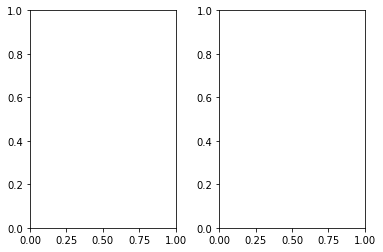

In [2]:
fig, ((ax11, ax12)) = plt.subplots(1,2,
                                 sharex=False,
                                 sharey=False,
                                  tight_layout=False)
fig.subplots_adjust(wspace=0.3)

Then input variable  𝛽  value, consider large  𝛽  first, and you can change it for your specific case.

In [3]:
beta = 0.8

Input the related constant physical quantites and set the title.

In [4]:
omega = 1
q = -1.6*10**-19
c = 3*10**8
R=50
ax12.set_title(r'$\beta$='+str(beta))

Text(0.5, 1, '$\\beta$=0.8')

Now, set the labels and titles of each figure.

In [5]:
ax11.axis('equal')
ax11.set_xlabel('x')
ax11.set_ylabel('y',rotation=0)
ax11.set_title('electron motion')
ax12.set_xlabel('t')
ax12.set_ylabel('E(t)',rotation=0)

Text(192.43478260869568, 0.5, 'E(t)')

We start to define independent variables. Electron's motion position and it's corresponding electric field. Mainly because $\omega t$ equals to t, so we replace it with t.

In [6]:
t = np.arange(-np.pi, np.pi, 0.05)
x = np.sin(t)
y = -np.cos(t)

line11, = ax11.plot(x,y,lw=2)

E = q*omega*beta*(beta-np.cos(t))/(1-beta*np.cos(t))**3/c/R
line12, = ax12.plot(t,E,lw=2)

We now define the initial point in this case.

In [7]:
point_ani1, = ax11.plot(np.sin(-np.pi), -np.cos(np.pi),  "ro")
point_ani2, = ax12.plot(-np.pi, q*omega*beta*(beta-np.cos(np.pi))/(1-beta*np.cos(np.pi))**3/c/R, "ro")

And then define the initial function and it's animation function.

In [8]:
def init():

    point_ani1, = ax11.plot(np.sin(-np.pi), -np.cos(np.pi), "ro")  
    point_ani2, = ax12.plot(-np.pi, q*omega*beta*(beta-np.cos(np.pi))/(1-beta*np.cos(np.pi))**3/c/R, "ro")
    return point_ani1, point_ani2,

def update_points(num):
    point_ani1.set_data(np.sin(np.pi*(num*0.02-1)), -np.cos(np.pi*(num*0.02-1)))
    point_ani2.set_data(np.pi*(num*0.02-1), q*omega*beta*(beta-np.cos(np.pi*(num*0.02-1)))/(1-beta*np.cos(np.pi*(num*0.02-1)))**3/c/R)

    return point_ani1,point_ani2,


At last, we output a movie to show the time details of a moving charge's radiation.  As the electron moves through its cycle, the maximum of the magnitude of the (positive) y-component of the electric field occurs (neglecting light travel time) is when the electron is at the bottom of the circle where $\vec{v}$ is in the positive $\hat x$ direction; that is, pointed towards the observer.  If $\beta$ is large (close to 1), there is a short pulse in $\hat y$ direction.

In [9]:
ax11.grid(ls="--")
ax12.grid(ls="--")

ani = animation.FuncAnimation(fig=fig, func = update_points, init_func=init, frames=100, interval=40, blit=False)

In [10]:
HTML(ani.to_jshtml())